In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("CleanedSets.csv")
playerdf = pd.read_csv("CleanedDetails.csv")

In [57]:
df.head()

,Player1,Player2,Winner,Score,Loser,MatchNo,EUAC,Date,P1 Seed,P1 Placement,P2 Seed,P2 Placement
0,Alumento,Owdy,Alumento,2-0,Owdy,1,1,2017-10-21,11,7,22,17
1,BambooBoss,FrankTank,FrankTank,2-0,BambooBoss,2,1,2017-10-21,14,13,19,5
2,Kotorious BRD,Altair,Kotorious BRD,0--1,Altair,3,1,2017-10-21,15,13,18,17
3,RD | | Dushni,Raffa_,Raffa_,2-0,RD | | Dushni,4,1,2017-10-21,12,17,21,4
4,InkA_,D2S_Maxou,InkA_,2-1,D2S_Maxou,5,1,2017-10-21,13,9,20,1


In [58]:
playerdf.head()

,Start ID,Challonge ID,Player_Map
0,1152276,0,D2S_Maxou
1,1118825,0,Ripha
2,1133810,0,Sabaca
3,1152521,0,Raffa_
4,1152258,0,FrankTank


## Most Common Score

In [59]:
df["Score"].unique()

array(['2-0', '0--1', '2-1', '3-1', '3-0', '3-2'], dtype=object)

In [60]:
values = df["Score"].value_counts()
values

2-0     1195
2-1      508
3-1      144
3-0      135
3-2      122
0--1      83
Name: Score, dtype: int64

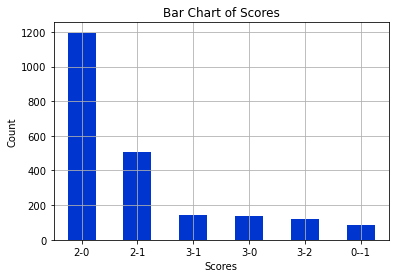

In [61]:
values.plot(kind="bar", color="#0035d0", grid=True)
plt.xlabel("Scores")
plt.ylabel("Count")
plt.xticks(rotation="0")
plt.title("Bar Chart of Scores")
plt.show()

Most common score is a 2-0. Out numbering the next highest, 2-1, by double <br>
"Finals" are less common but they are roughly the same. But 3-2 is the lowest indicating that Finals are not generally all that even 

## Correlation

In [62]:
heat = df.corr()

In [63]:
heat

,MatchNo,P1 Seed,P1 Placement,P2 Seed,P2 Placement
MatchNo,1.000000,-0.027995,-0.169150,-0.211780,-0.341174
P1 Seed,-0.027995,1.000000,0.700772,0.441375,0.446473
P1 Placement,-0.169150,0.700772,1.000000,0.527211,0.471855
P2 Seed,-0.211780,0.441375,0.527211,1.000000,0.754884
P2 Placement,-0.341174,0.446473,0.471855,0.754884,1.000000


<AxesSubplot:>

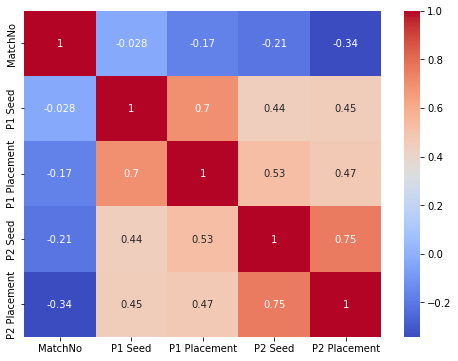

In [64]:
plt.figure(figsize=(8,6))
sns.heatmap(data=heat, annot=True, cmap="coolwarm")

High correlation between a player's seeding and their placement (0.7 for Player 1 and 0.75 for Player 2). <br>
Suggesting that player's are usually seeded appropriately

## Who are the strongest players?

###  Each player who has won an EUAC

In [67]:
# Add players to a set that have had a placement of 1. Sets don't contain duplicates
players = set()
for i in playerdf["Player_Map"]:
    for a,b,c,d in zip(df["Player1"], df["Player2"], df["P1 Placement"], df["P2 Placement"]):
        if i == a:
            if c == 1:
                players.add(i)
                continue
            else:
                continue
        if i == b:
            if d == 1:
                players.add(i)
                continue
            else:
                continue

In [68]:
players

{'Alistair__',
 'D2S_Maxou',
 'Frank001',
 'Grimwood96',
 'Iceman92',
 'JrARMS',
 'Raffa_',
 'Ripha',
 'Shedy',
 'Yamber',
 'Yätta',
 'deleted4353211',
 'replicant___'}